# Business analytics- Sample superstore

In [44]:
# import the libraries and read the csv file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Exploratory data analysis

In [47]:
df.groupby('Sub-Category')['Sales'].sum()

Sub-Category
Accessories    167380.3180
Appliances     107532.1610
Art             27118.7920
Binders        203412.7330
Bookcases      114879.9963
Chairs         328449.1030
Copiers        149528.0300
Envelopes       16476.4020
Fasteners        3024.2800
Furnishings     91705.1640
Labels          12486.3120
Machines       189238.6310
Paper           78479.2060
Phones         330007.0540
Storage        223843.6080
Supplies        46673.5380
Tables         206965.5320
Name: Sales, dtype: float64

In [48]:
# groupby to find the most profit making categories
df.groupby('Category').sum()

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,118196026,741999.7953,8028,368.89,18451.2728
Office Supplies,330772872,719047.0320,22906,947.80,122490.8008
Technology,102603754,836154.0330,6939,244.40,145454.9481


#### Technology category has made the highest number of profit followed by office supplies and furniture. The reason behind the low profit of furniture is the low sales in quantity of the furniure.

In [49]:
# use a function and plot the most profit making categories
def groupby(var,var1):

    bar=df.groupby([var])[var1].sum()
    plt.figure(figsize=[8,7])
    bar.plot.bar()
    plt.xticks(rotation=0)
    plt.title('{} with highest {}'.format(var,var1))
    return bar

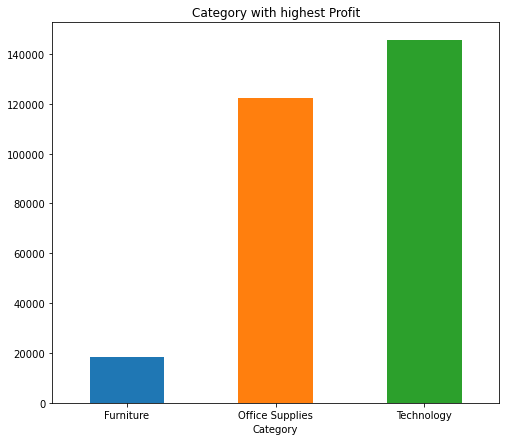

In [50]:
groupby('Category','Profit');

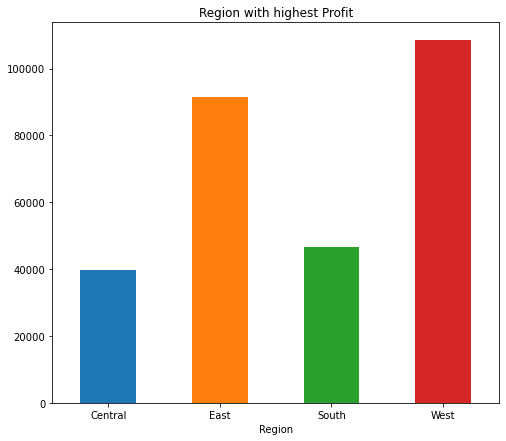

In [51]:
# Show the region wise profit of each category
groupby('Region','Profit');

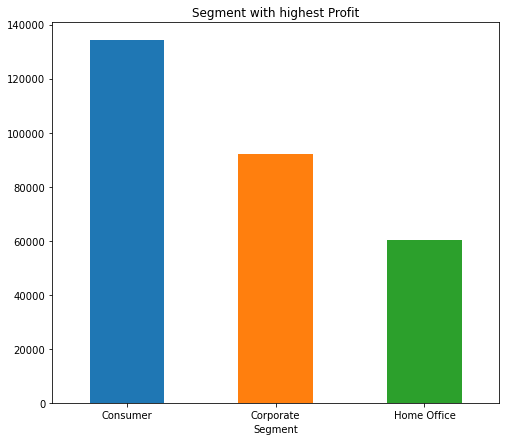

In [52]:
# segments that genrate highest profit
groupby('Segment','Profit');

#### Consumers seemed to be the highest purchasers followed by corporates and home offices 

In [53]:
# groupby state and category to find the total profits
df2=df.groupby(['State','Category'])['Profit'].sum().nlargest(10)

In [54]:
# convert index it to column
df2=df2.reset_index()

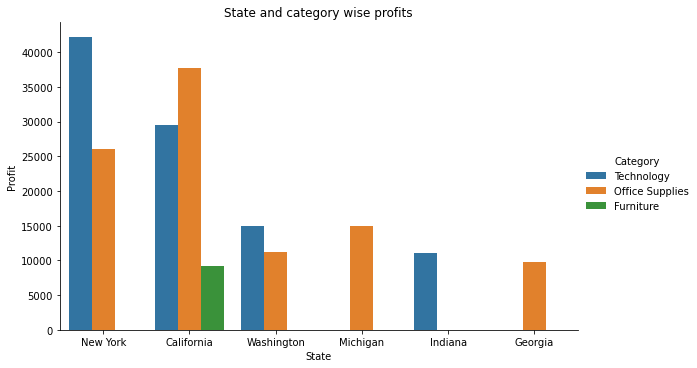

In [55]:
sns.catplot(x='State',y='Profit',kind='bar',hue='Category',data=df2,aspect= 25/15)
plt.title('State and category wise profits');

In [56]:
df3=df.groupby('State')['Profit'].sum().nlargest(10)

In [57]:
# convert index it to column
df3=df3.reset_index()

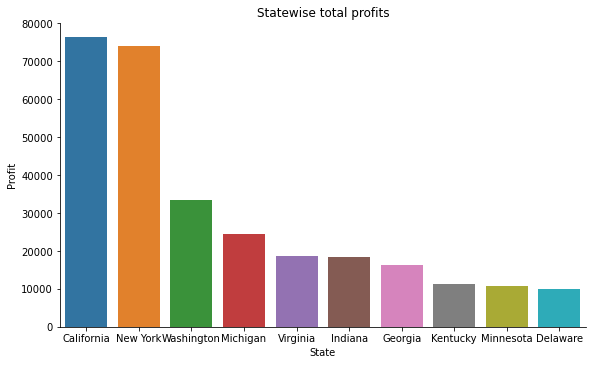

In [58]:
sns.catplot(x='State',y='Profit',kind='bar',data=df3,aspect= 25/15)
plt.title('Statewise total profits');

##### California is the highest profit generating state when we consider all categories but new york generated more profit when it comes to technolgy

### Repeat the same to find the highest sales


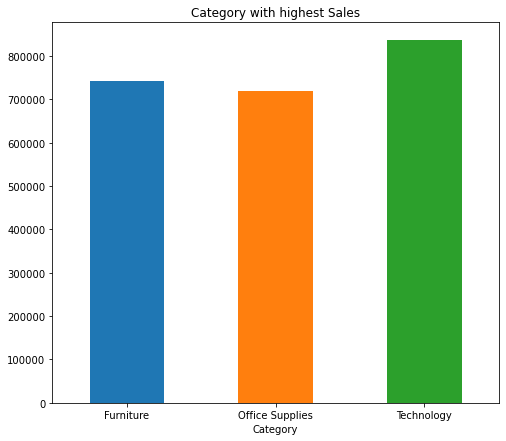

In [59]:
groupby('Category','Sales');

#### Technology category has made the highest number of sales followed by furniture and office supplies

In [60]:
sub_cat=df.groupby(['Category','Sub-Category'])['Sales'].sum().nlargest(10)

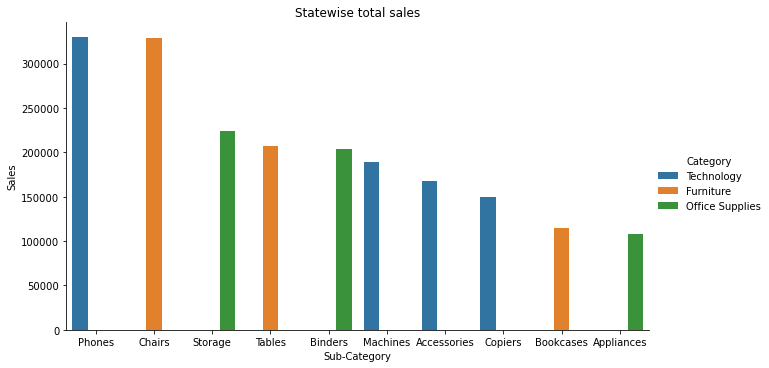

In [61]:
sub_cat=sub_cat.reset_index()
# plot a catplot
sns.catplot(x='Sub-Category',y='Sales',kind='bar',hue='Category',data=sub_cat,aspect= 28/15)

plt.title('Statewise total sales');
# Xticks

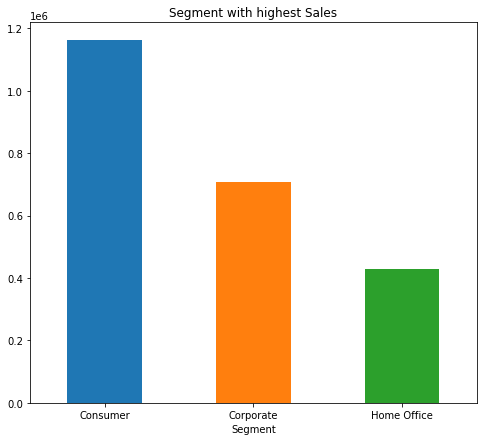

In [62]:
groupby('Segment','Sales');

#### The highest number of sales were made to consumers followed by corporates and home office.

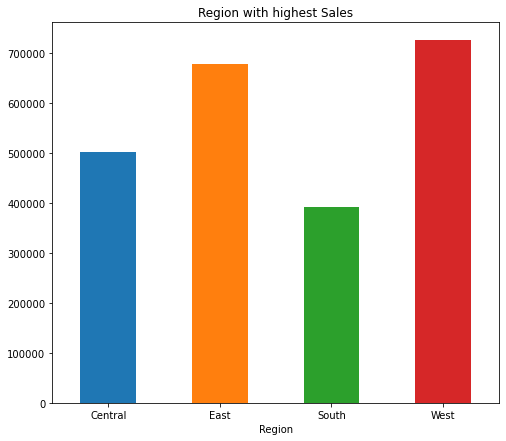

In [63]:
groupby('Region','Sales');

#### The highest sales with more than 700000 were made in west region followed by East, Central, South.

In [64]:
# segment wise purchase
seg=df.groupby(['Segment','Sub-Category'])['Sales'].sum().nlargest(10)

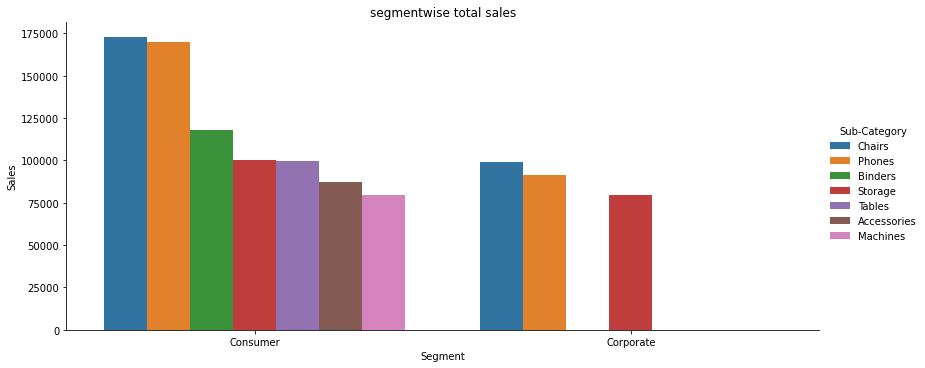

In [65]:
# segment wise purchase
seg=df.groupby(['Segment','Sub-Category'])['Sales'].sum().nlargest(10)
seg=seg.reset_index()
sns.catplot(x='Segment',y='Sales',kind='bar',hue='Sub-Category',data=seg,aspect= 35/15)
plt.title('segmentwise total sales');

#### Chairs are the highest sold products followed by mobiles and binders.

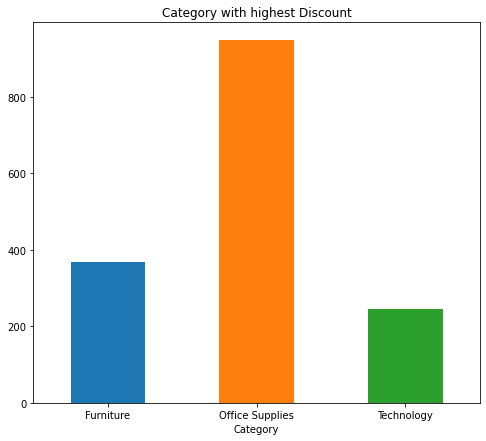

In [66]:
# categories with highest discount
groupby('Category','Discount');

#### Highest discounts were provided to office supplies category followed by Furniture and Technology

In [67]:
# top 10 Profitable features
df.nlargest(10,['Profit'])

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,United States,Lafayette,Indiana,47905,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,United States,Seattle,Washington,98115,West,Technology,Copiers,13999.960,4,0.0,6719.9808
4190,Standard Class,Consumer,United States,Newark,Delaware,19711,East,Technology,Copiers,10499.970,3,0.0,5039.9856
9039,Standard Class,Consumer,United States,Detroit,Michigan,48205,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4098,Standard Class,Consumer,United States,Minneapolis,Minnesota,55407,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
2623,First Class,Home Office,United States,New York City,New York,10024,East,Technology,Copiers,11199.968,4,0.2,3919.9888
509,Standard Class,Consumer,United States,Atlanta,Georgia,30318,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750
8488,Second Class,Consumer,United States,Arlington,Virginia,22204,South,Technology,Machines,8749.950,5,0.0,2799.9840
7666,Standard Class,Home Office,United States,Providence,Rhode Island,2908,East,Technology,Copiers,5399.910,9,0.0,2591.9568
6520,Second Class,Consumer,United States,Jackson,Michigan,49201,Central,Office Supplies,Binders,5443.960,4,0.0,2504.2216


In [68]:
# groupby state and category to find the total profits
df2=df.groupby(['State','Category'])['Sales'].sum().nlargest(20)

In [69]:
# convert index it to column
df2=df2.reset_index()

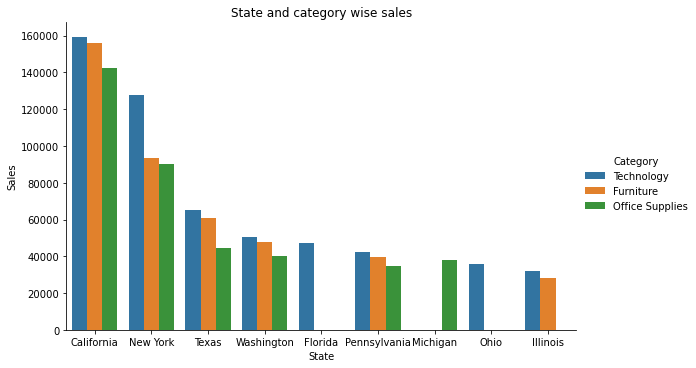

In [70]:
sns.catplot(x='State',y='Sales',kind='bar',hue='Category',data=df2,aspect= 25/15)
plt.title('State and category wise sales');

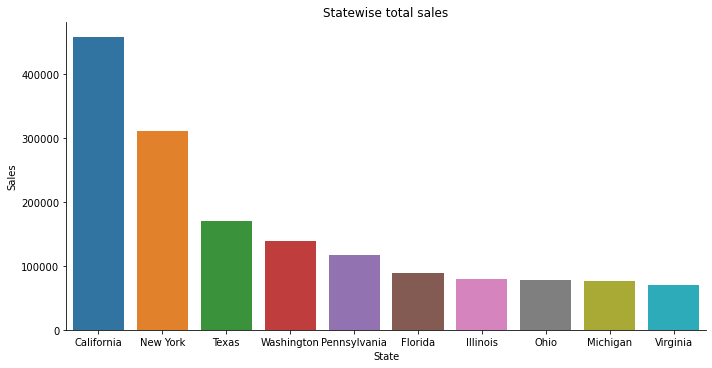

In [71]:
df3=df.groupby('State')['Sales'].sum().nlargest(10)
# convert index it to column
df3=df3.reset_index()
# plot a catplot
sns.catplot(x='State',y='Sales',kind='bar',data=df3,aspect= 30/15)
plt.title('Statewise total sales');

##### States like Texas, Pennsylvania, Florida, Ohio are some of the states with highest sales but they don't appear in the top profits category. That must be due to high discounts provided to the customers of those states

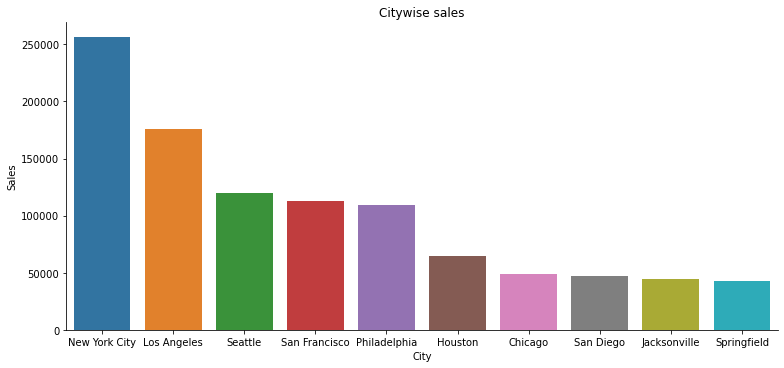

In [72]:
City=df.groupby('City')['Sales'].sum().nlargest(10)
City=City.reset_index()
sns.catplot(x='City',y='Sales',kind='bar',data=City,aspect= 33/15)
plt.title('Citywise sales');

##### NewYork city has the highest number of sales of more than 250000 followed by Los angles and Seattle. The discounts provided to  a particlar city had less impact in increasing the sales.

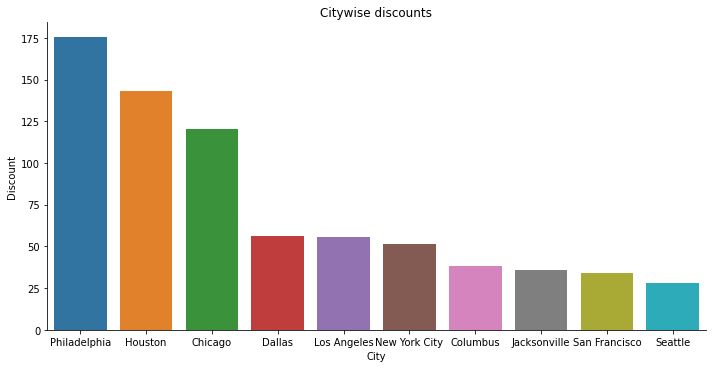

In [73]:
city_discount=df.groupby('City')['Discount'].sum().nlargest(10)
city_discount=city_discount.reset_index()
sns.catplot(x='City',y='Discount',kind='bar',data=city_discount,aspect= 30/15)
plt.title('Citywise discounts');

In [74]:
Discount=df.groupby('State')['Discount'].sum().nlargest(10)

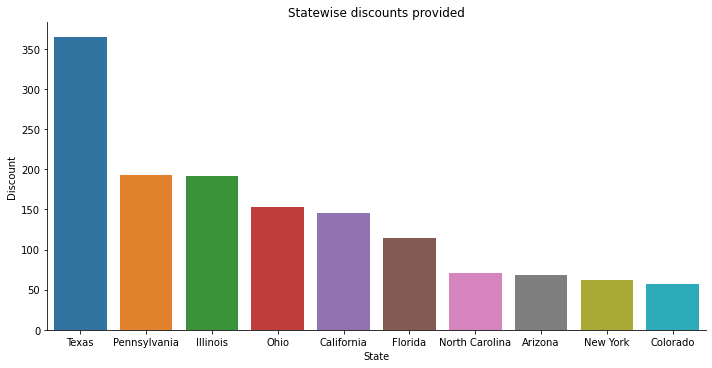

In [75]:
Discount=Discount.reset_index()
sns.catplot(x='State',y='Discount',kind='bar',data=Discount,aspect= 30/15)
plt.title('Statewise discounts provided');

##### Texas, Pennsylvania and Illinios could not make it to the top profit making states in spite of high sales is due to high discounts provided to the customers of these states.

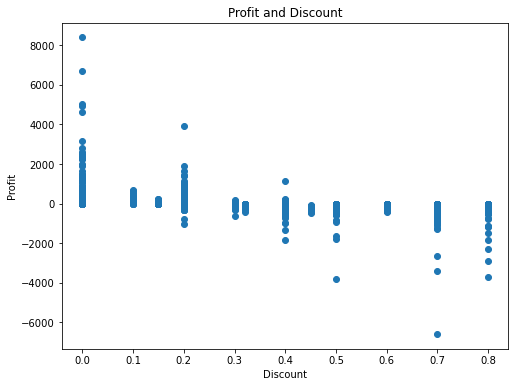

In [76]:
# Find the relationship between Discount and Profit
plt.figure(figsize=[8,6])
plt.scatter(df.Discount,df.Profit)
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Profit and Discount');

#### The above plot shows there is a negative linear trend which means the increase in discounts will lead to decrease in profit ratio

## Loss making cities and states

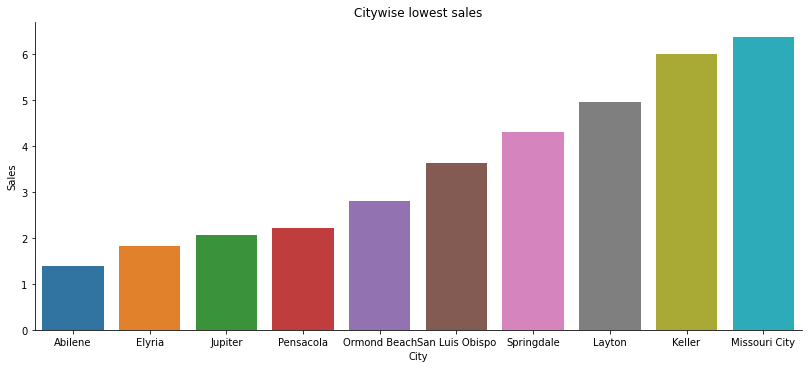

In [77]:
# groupby city and plot a graph 
city=df.groupby('City')['Sales'].sum().nsmallest(10)
city=city.reset_index()
sns.catplot(x='City',y='Sales',kind='bar',data=city,aspect= 34/15)
plt.title('Citywise lowest sales');

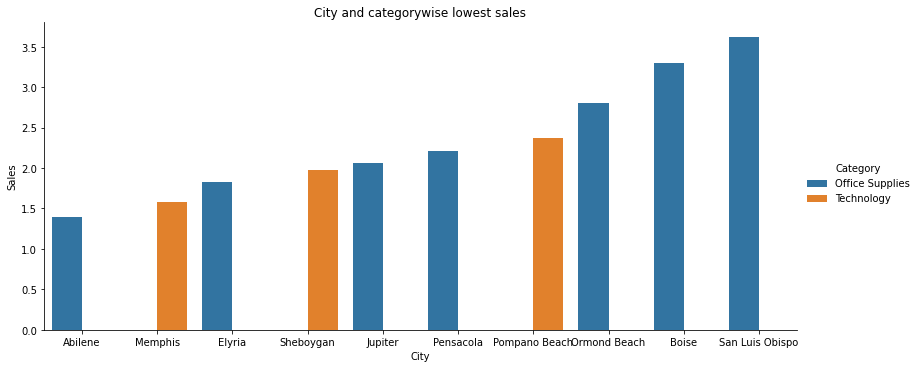

In [78]:
# groupby city and plot a graph 
city=df.groupby(['City','Category'])['Sales'].sum().nsmallest(10)
city=city.reset_index()
sns.catplot(x='City',y='Sales',kind='bar',data=city,hue='Category',aspect= 34/15)
plt.title('City and categorywise lowest sales');

#### Individual categories of goods are sold in these cities with office supplies in majority of these cities. The company should focus on increasing the sales of other categories rather than selling individual categories.

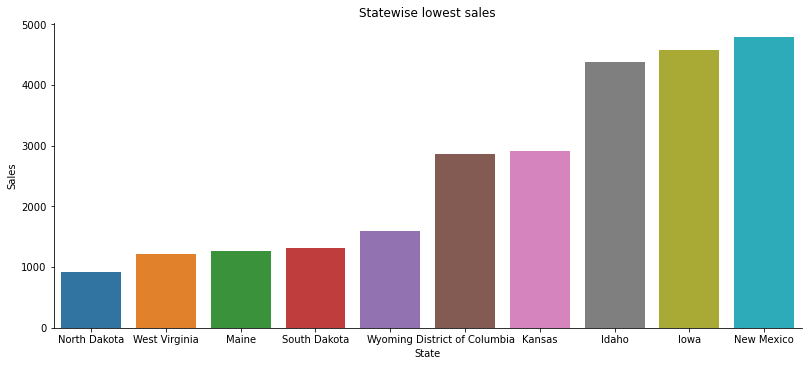

In [79]:
state=df.groupby('State')['Sales'].sum().nsmallest(10)
state=state.reset_index()
sns.catplot(x='State',y='Sales',kind='bar',data=state,aspect= 34/15)
plt.title('Statewise lowest sales');

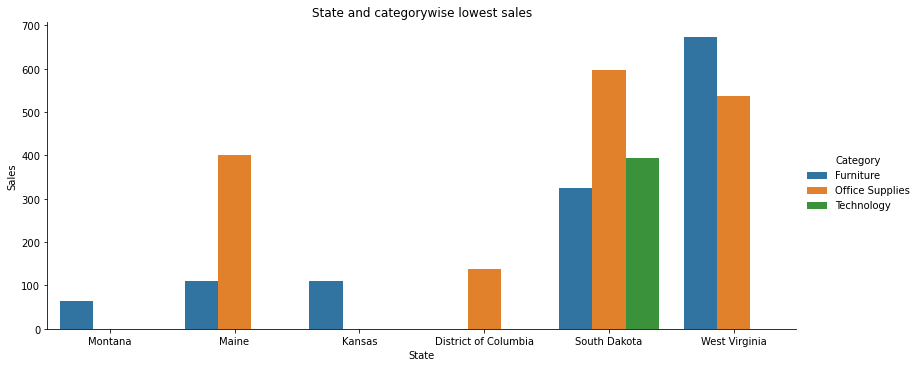

In [80]:
state=df.groupby(['State','Category'])['Sales'].sum().nsmallest(10)
state=state.reset_index()
sns.catplot(x='State',y='Sales',kind='bar',hue='Category',data=state,aspect= 34/15)
plt.title('State and categorywise lowest sales');

##### The reason behind low overall sales is due to the low sales in technology and office supplies. This shows the states are tier3 due to less companies operating.  

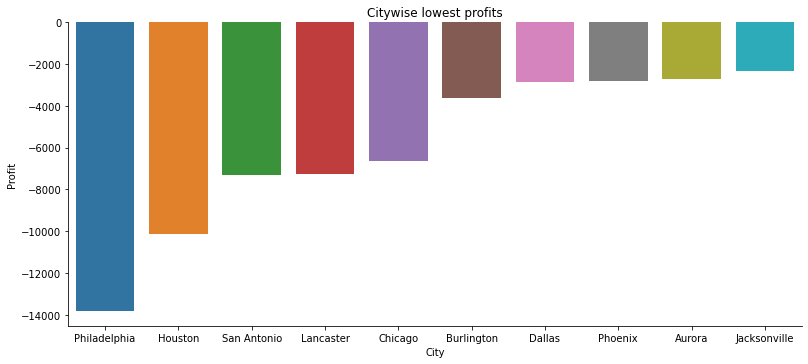

In [81]:
# groupby city and plot a graph to show the profits
city=df.groupby('City')['Profit'].sum().nsmallest(10)
city=city.reset_index()
sns.catplot(x='City',y='Profit',kind='bar',data=city,aspect= 34/15)
plt.title('Citywise lowest profits');

#### Cities like Philadelphia, Houston have higher negative values which means they have higher losses

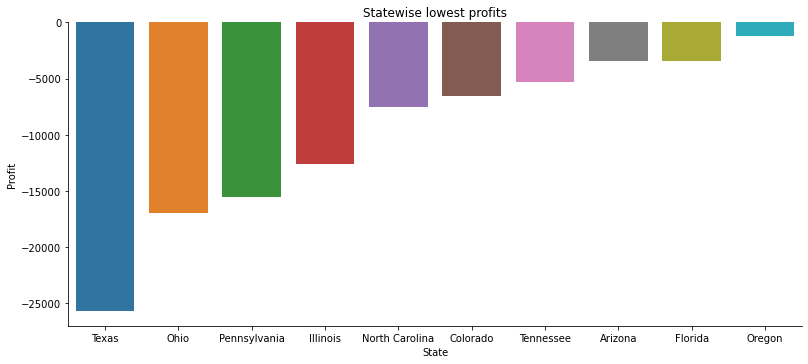

In [82]:
state=df.groupby('State')['Profit'].sum().nsmallest(10)
state=state.reset_index()
sns.catplot(x='State',y='Profit',kind='bar',data=state,aspect= 34/15)
plt.title('Statewise lowest profits');

##### The states who are being provided highest discounts are getting lowest profits. This clearly concludes the company should foucus on reducing the discounts on these states